# $$\text{Financial Data Analytics}$$

## III. Time series forecasting

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
jnj = pd.read_csv("../artifacts/jnj/jnj_data.csv", index_col='Date', parse_dates=True)
lly = pd.read_csv("../artifacts/lly/lly_data.csv", index_col='Date', parse_dates=True)
unh = pd.read_csv("../artifacts/unh/unh_data.csv", index_col='Date', parse_dates=True)
mrk = pd.read_csv("../artifacts/mrk/mrk_data.csv", index_col='Date', parse_dates=True)

In [3]:
jnj.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-31,149.750000,150.000000,148.639999,148.869995,132.683792,8651700
2020-02-03,149.419998,150.490005,149.240005,150.169998,133.842468,5765200
2020-02-04,151.490005,152.750000,151.199997,151.600006,135.116989,6541400
2020-02-05,151.720001,154.020004,151.309998,153.990005,137.247086,5979900
2020-02-06,154.250000,154.500000,152.740005,153.529999,136.837143,6201200


<Axes: title={'center': 'JNJ Close Price'}, xlabel='Date', ylabel='Close'>

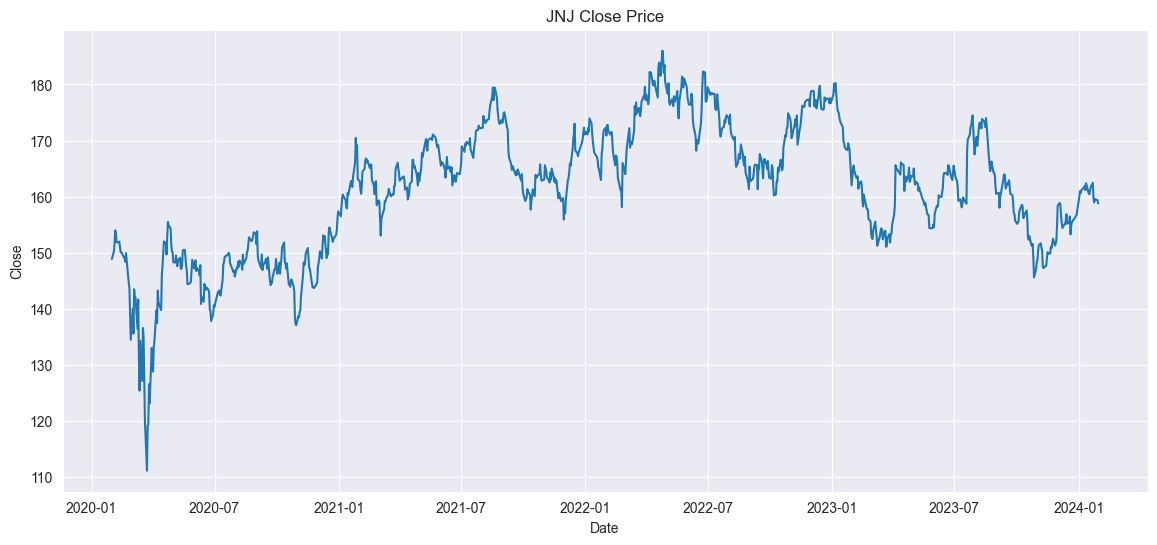

In [23]:
plt.rcParams['figure.figsize'] = (14,6)
sns.set_style("darkgrid")
plt.title("JNJ Close Price")
sns.lineplot(x="Date", y='Close', data=jnj)

We'll plot the same for other graphs

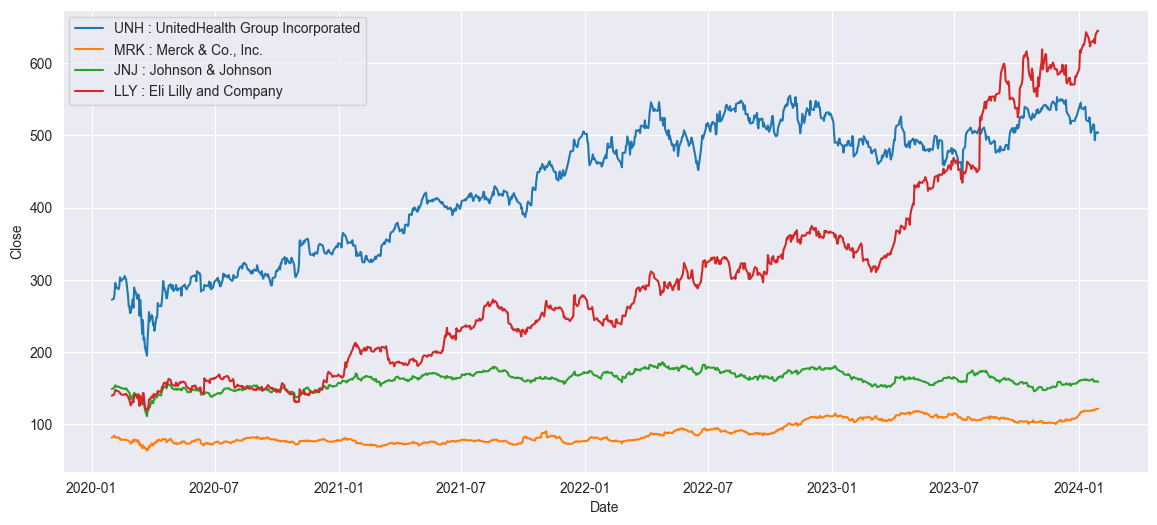

In [24]:
df_dict = {"UNH : UnitedHealth Group Incorporated": unh, 
           "MRK : Merck & Co., Inc.": mrk,
           "JNJ : Johnson & Johnson": jnj,
           "LLY : Eli Lilly and Company": lly}
for name, data in df_dict.items():
    sns.lineplot(x="Date", y='Close', data=data, label=name)

For better trend visibility, we'll plot both MRK and JNJ close prices in a separate graph.

<Axes: xlabel='Date', ylabel='Close'>

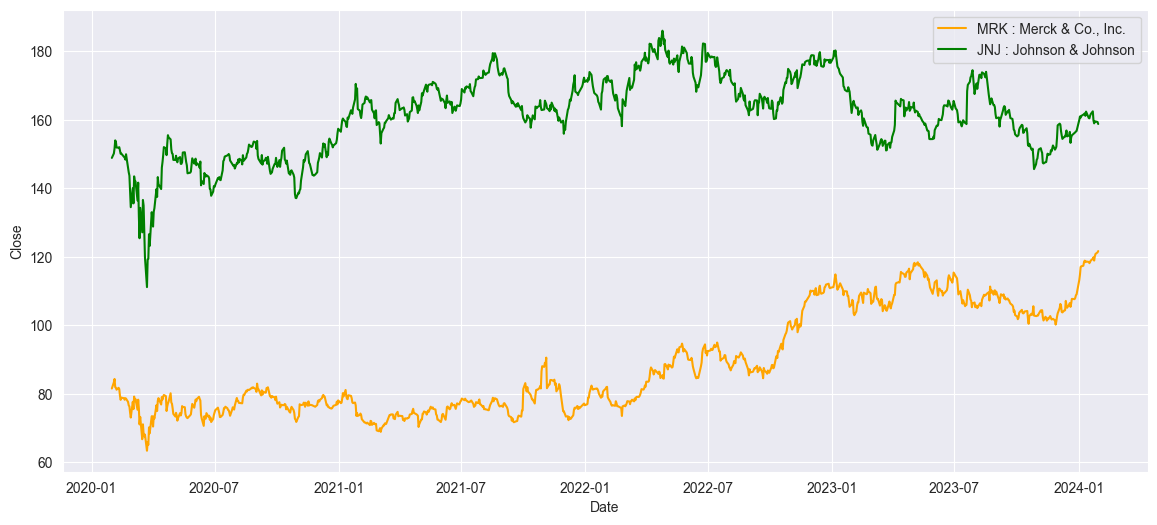

In [25]:
sns.lineplot(x="Date", y='Close', data=mrk, label="MRK : Merck & Co., Inc.", color="orange")
sns.lineplot(x="Date", y='Close', data=jnj, label="JNJ : Johnson & Johnson", color="green")


Looking at the stock price trends shown in the image, we can make the following observations:

**UnitedHealth Group (UNH):**
- UNH has seen a steady and substantial increase in its stock price over the entire period shown, significantly outperforming the other firms.
- This strong upward trajectory likely reflects UNH's impressive revenue growth, expansion strategies, and robust financial performance.

**Johnson & Johnson (JNJ):**
- JNJ's stock price has followed a relatively stable upward trend, though with some volatility.
- The stock seems to have experienced periods of stagnation or slight declines, which could be attributed to factors like competition, legal issues, or changes in the healthcare landscape.

**Merck & Co. (MRK):**
- MRK's stock price exhibits an overall upward trend but with significant fluctuations and periods of sideways movement.
- The volatility in MRK's stock price could be due to factors like changes in the pharmaceutical pipeline, patent expirations, or regulatory challenges.

**Eli Lilly and Company (LLY):**
- LLY's stock price shows the most modest growth among the four firms, with periods of sideways movement and some volatility.
- The relatively slower growth could be due to factors like competition in the pharmaceutical market, pricing pressures, or challenges in developing new products.

Overall, UNH's stock price performance stands out as the strongest, reflecting its consistent revenue growth and successful expansion strategies. JNJ and MRK exhibit moderate to high growth, with periods of volatility potentially driven by industry-specific factors. LLY's stock price growth appears to be the most muted, possibly due to increased competition or challenges in the pharmaceutical sector.